In [202]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns 
from scipy import stats 
import urllib



# Loading the data

In [203]:
# csv file read/load
df = pd.read_csv('D:\\AB_NYC_2019.csv')
df.shape

(48895, 18)

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [205]:
print(' the field name of data:',df.columns)

 the field name of data: Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'Unnamed: 16', 'Unnamed: 17'],
      dtype='object')


In [206]:
# data output
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Unnamed: 16,Unnamed: 17
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365,NaN,NaN
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355,NaN,NaN
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,NaN,NaN
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194,NaN,NaN
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,NaN,NaN
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,NaN,NaN
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,NaN,NaN
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,NaN,NaN


In [207]:
### Check data types of all columns
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
Unnamed: 16                       float64
Unnamed: 17                       float64
dtype: object

In [208]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Unnamed: 16,Unnamed: 17
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365,NaN,NaN
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355,NaN,NaN
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,NaN,NaN
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194,NaN,NaN
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0,NaN,NaN


In [209]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Unnamed: 16,Unnamed: 17
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,NaN,NaN
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,NaN,NaN
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,NaN,NaN
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,NaN,NaN
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23,NaN,NaN


In [210]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Unnamed: 16,Unnamed: 17
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000,0.0,0.0
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327,NaN,NaN
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289,NaN,NaN
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,NaN,NaN
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000,NaN,NaN
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000,NaN,NaN
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000,NaN,NaN
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,NaN,NaN


Checking null values. Since last_review and reviews per month have same null records and unnamed16,17 have same null , lets assume that that listing never got ant review

In [211]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
Unnamed: 16                       48895
Unnamed: 17                       48895
dtype: int64

Let's replace reviews per month Nan by zero and unnamed nan by zero and null name and host_name by NoName. Also, replace last review with "Not reviewed"

In [212]:
df.fillna({'reviews_per_month':0}, inplace=True)
df.fillna({'name':"NoName"}, inplace=True)
df.fillna({'host_name':"NoName"}, inplace=True)
df.fillna({'last_review':"NotReviewed"}, inplace=True)
df.fillna({'Unnamed: 16':0}, inplace=True)
df.fillna({'Unnamed: 17':0}, inplace=True)

Time to check results

In [213]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
Unnamed: 16                       0
Unnamed: 17                       0
dtype: int64

Looking at the price column

In [214]:
df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

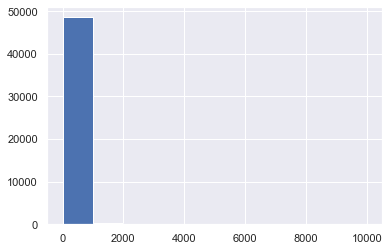

In [215]:
### See the distribution of price
hist_price=df["price"].hist()
### We observe that most listings have price less than $1000

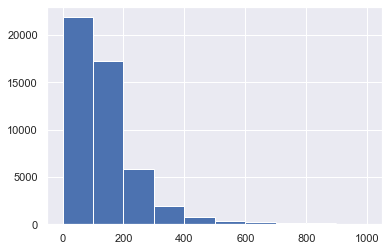

In [216]:
### Lets plot histogram for prices less than $2000
hist_price1=df["price"][df["price"]<1000].hist()
### This give a clearer picture!



How many listings have price more than 1000?


In [217]:
dataset =df[df["price"]>1000]
dataset

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Unnamed: 16,Unnamed: 17
496,174966,Luxury 2Bed/2.5Bath Central Park View,836168,Henry,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,2000,30,30,5/5/2018,0.33,11,0,0.0,0.0
762,273190,6 Bedroom Landmark West Village Townhouse,605463,West Village,Manhattan,West Village,40.73301,-74.00268,Entire home/apt,1300,5,28,9/25/2018,0.31,4,297,0.0,0.0
946,363673,Beautiful 3 bedroom in Manhattan,256239,Tracey,Manhattan,Upper West Side,40.80142,-73.96931,Private room,3000,7,0,NotReviewed,0.00,1,365,0.0,0.0
1105,468613,$ (Phone number hidden by Airbnb) weeks - room f,2325861,Cynthia,Manhattan,Lower East Side,40.72152,-73.99279,Private room,1300,1,0,NotReviewed,0.00,1,0,0.0,0.0
1480,664047,Lux 2Bed/2.5Bath Central Park Views,836168,Henry,Manhattan,Upper West Side,40.77516,-73.98573,Entire home/apt,2000,30,59,1/28/2016,0.71,11,364,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48080,36074198,Luxury apartment 2 min to times square,203565865,Vinícius,Manhattan,SoHo,40.72060,-74.00023,Entire home/apt,1308,2,0,NotReviewed,0.00,1,179,0.0,0.0
48304,36189195,Next to Times Square/Javits/MSG! Amazing 1BR!,270214015,Rogelio,Manhattan,Hell's Kitchen,40.75533,-73.99866,Entire home/apt,2999,30,0,NotReviewed,0.00,1,222,0.0,0.0
48305,36189257,2BR Near Museum Mile! Upper East Side!,272166348,Mary Rotsen,Manhattan,Upper East Side,40.78132,-73.95262,Entire home/apt,1999,30,0,NotReviewed,0.00,1,270,0.0,0.0
48523,36308562,"Tasteful & Trendy Brooklyn Brownstone, near Train",217732163,Sandy,Brooklyn,Bedford-Stuyvesant,40.68767,-73.95805,Entire home/apt,1369,1,0,NotReviewed,0.00,1,349,0.0,0.0


In [218]:
dataset=df[df["price"]<1000]

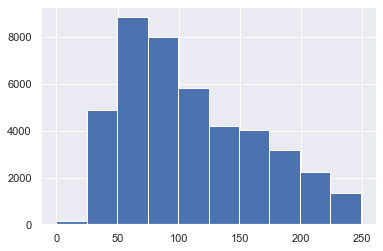

In [219]:


### We see a more Gaussian distribution here
hist_price2=dataset["price"][dataset["price"]<250].hist()



In [220]:
### We use 250 as threshold price 
dataset=df[df["price"]<250]

In [221]:
### Looking at the price column again
dataset["price"].describe()

count    42669.000000
mean       107.897748
std         53.803457
min          0.000000
25%         65.000000
50%         99.000000
75%        150.000000
max        249.000000
Name: price, dtype: float64

# Data Cleaning

clean records with price = 0


In [222]:
data = df[df['price']>0]
data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Unnamed: 16,Unnamed: 17
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365,0.0,0.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355,0.0,0.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NotReviewed,0.00,1,365,0.0,0.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194,0.0,0.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0,0.0,0.0


In [223]:
data['price'].describe()

count    48884.000000
mean       152.755053
std        240.170260
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [224]:
len(data)

48884

# find outlier records in price

 if        data>mean+3∗std-
 we know it as outlier

In [225]:
data1 = data[data['price']<= data['price'].mean() + 3*data['price'].std()]
data1.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Unnamed: 16,Unnamed: 17
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365,0.0,0.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355,0.0,0.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NotReviewed,0.00,1,365,0.0,0.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194,0.0,0.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0,0.0,0.0


In [226]:
len(data1)

48496

In [227]:
data1.price.describe()

count    48496.000000
mean       138.778373
std        107.550128
min         10.000000
25%         69.000000
50%        105.000000
75%        175.000000
max        860.000000
Name: price, dtype: float64

In [228]:
data1['neighbourhood_group'].value_counts()

Manhattan        21377
Brooklyn         20011
Queens            5650
Bronx             1088
Staten Island      370
Name: neighbourhood_group, dtype: int64

<AxesSubplot:>

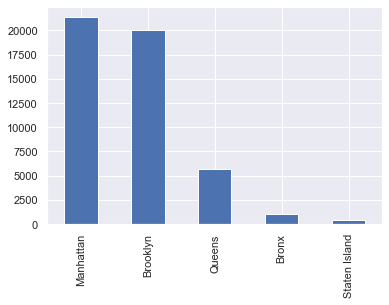

In [229]:
data1['neighbourhood_group'].value_counts().plot(kind = "bar")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

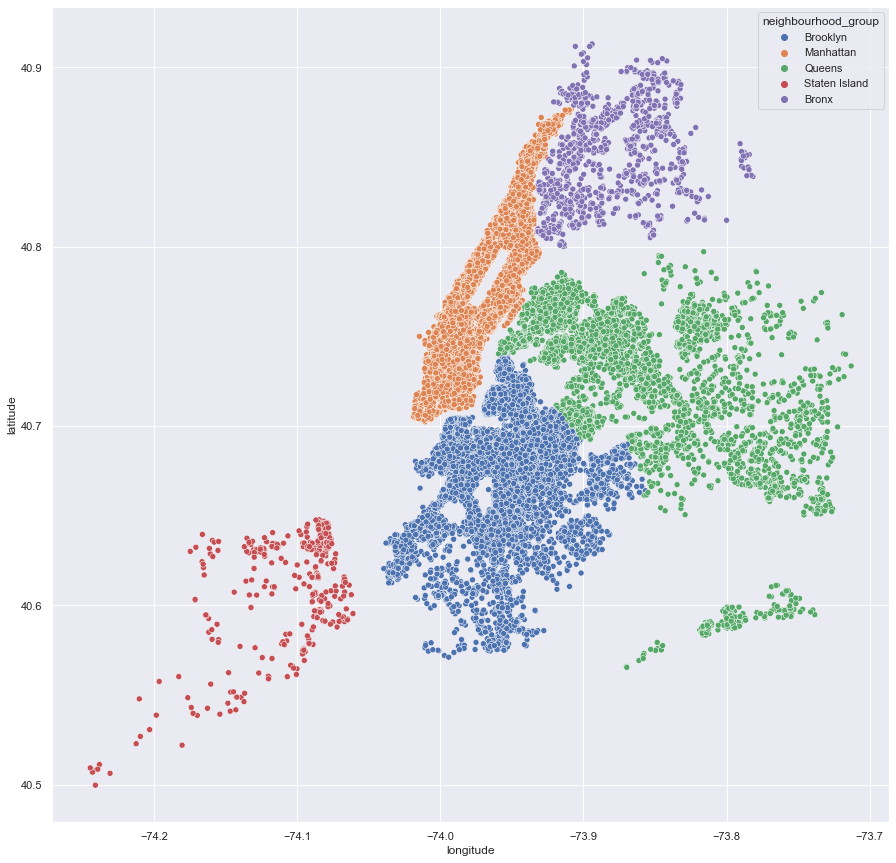

In [230]:
plt.figure(figsize=(15, 15))
sns.scatterplot(x=data.longitude,y=data.latitude,hue=data.neighbourhood_group)

In [231]:
### Lets see the average listing price by neighbourhood group
ng_price=data1.groupby("neighbourhood_group")["price"].mean()

In [232]:
### Manhattan is most expensive and Bronx is the least expensive place to live
ng_price

neighbourhood_group
Bronx             84.521140
Brooklyn         116.576783
Manhattan        174.867942
Queens            94.104779
Staten Island     96.148649
Name: price, dtype: float64

# check distribution of price

D:\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

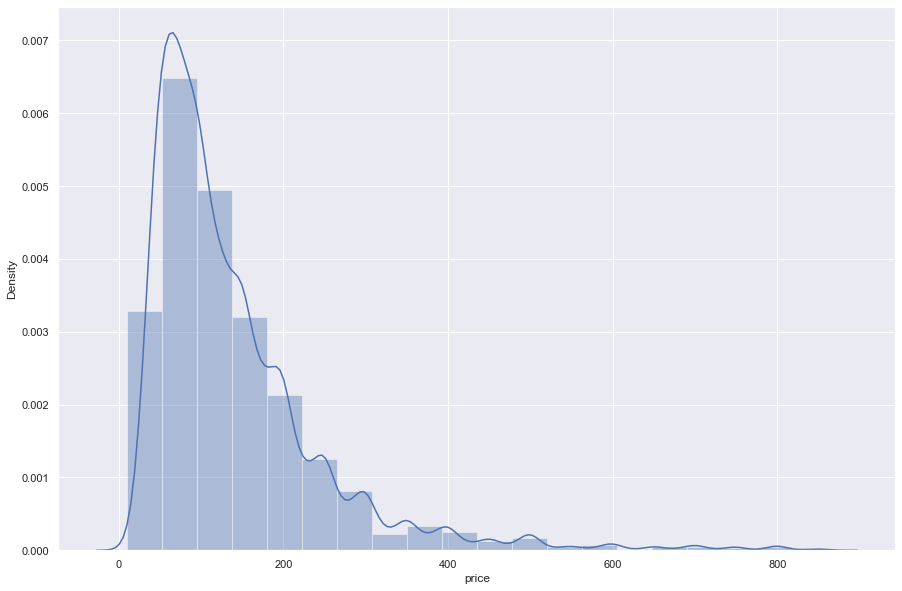

In [45]:
sns.set(rc={'figure.figsize':(15,10)})
sns.distplot(data1['price'],kde_kws={"label": 'price'}, bins=20)

# Check Distribution of price in each Neighbourhood group

D:\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  wa

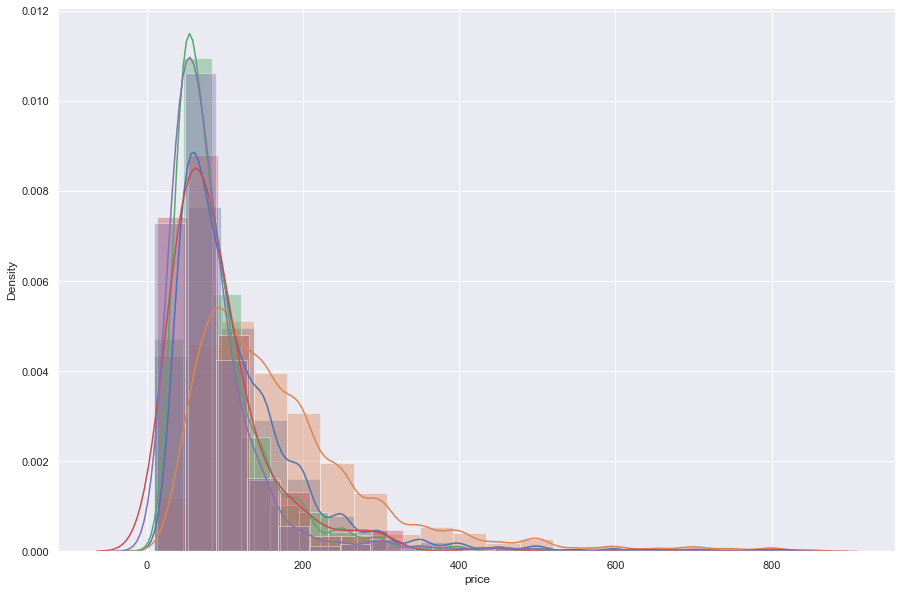

In [46]:
sns.set(rc={'figure.figsize':(15,10)})
for groups in data1.neighbourhood_group.unique():
    sns.distplot(data1.price[data1['neighbourhood_group']==groups],kde_kws={"label": groups}, bins=20)

# Transfer price to ln price to make the dist , Normal

we want to adjust a function to make price data , normal dist.

In [48]:
data1['price_log_e'] = np.log(data1['price'])
data1.head(5)

<ipython-input-48-4354674acd80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['price_log_e'] = np.log(data1['price'])


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Unnamed: 16,Unnamed: 17,price_log_e
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365,0.0,0.0,5.003946
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355,0.0,0.0,5.416100
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NotReviewed,0.00,1,365,0.0,0.0,5.010635
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194,0.0,0.0,4.488636
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0,0.0,0.0,4.382027


D:\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_log_e', ylabel='Density'>

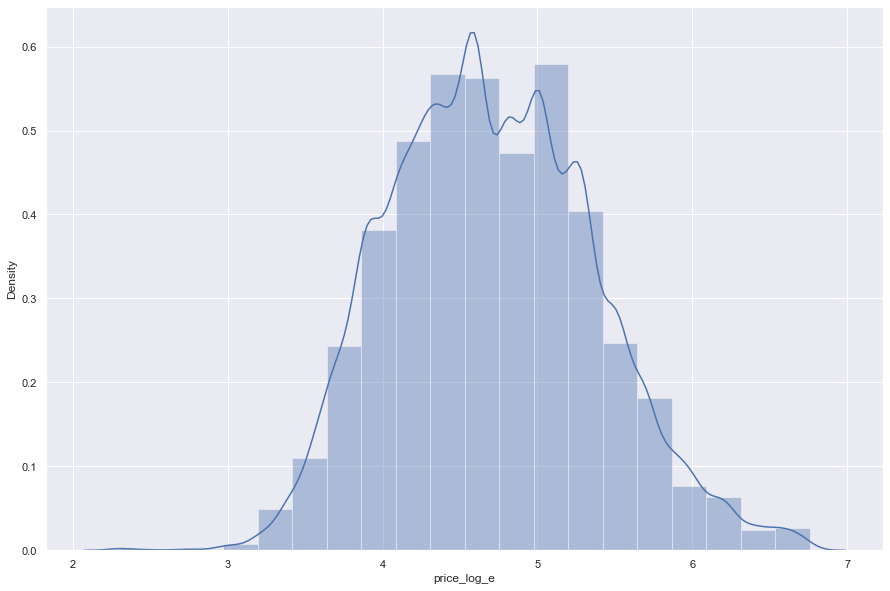

In [49]:
sns.set(rc={'figure.figsize':(15,10)})
sns.distplot(data1['price_log_e'],kde_kws={"label": 'price in log e'}, bins=20)

In [50]:
stats.normaltest(data1["price_log_e"])

NormaltestResult(statistic=562.3974954306634, pvalue=7.532437713364285e-123)

# Transfer price to logprice10 to make the dist , Normal

we want to adjust a function to make price data , normal dist.

In [233]:
data1['price_log_10'] = np.log10(data1['price'])
data1.head(5)

<ipython-input-233-ebe5c03058ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['price_log_10'] = np.log10(data1['price'])


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Unnamed: 16,Unnamed: 17,price_log_10
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365,0.0,0.0,2.173186
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355,0.0,0.0,2.352183
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NotReviewed,0.00,1,365,0.0,0.0,2.176091
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194,0.0,0.0,1.949390
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0,0.0,0.0,1.903090


D:\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_log_10', ylabel='Density'>

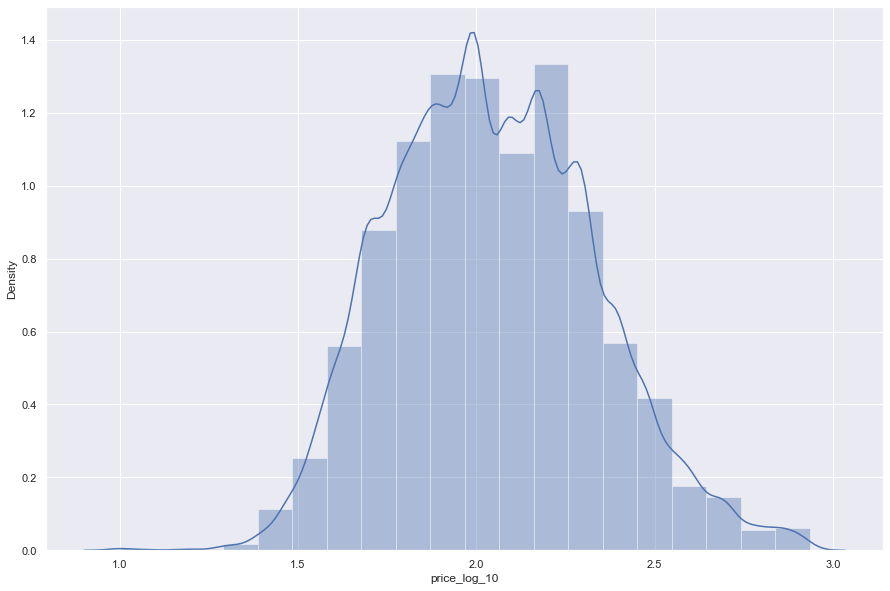

In [234]:
sns.set(rc={'figure.figsize':(15,10)})
sns.distplot(data1['price_log_10'],kde_kws={"label": 'price in log 10'}, bins=20)

In [235]:
stats.normaltest(data1["price_log_10"])

NormaltestResult(statistic=562.3974954306705, pvalue=7.532437713337645e-123)

D:\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  wa

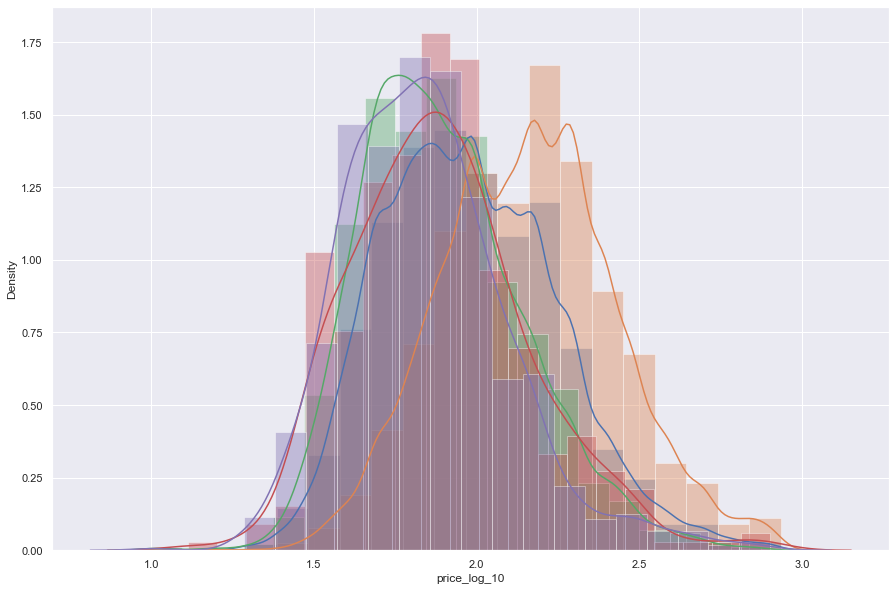

In [236]:
sns.set(rc={'figure.figsize':(15,10)})
for groups in data1.neighbourhood_group.unique():
    sns.distplot(data1.price_log_10[data1['neighbourhood_group']==groups],kde_kws={"label": groups}, bins=20)

# realation between neighbourhood_group & price_log_10

D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neighbourhood_group', ylabel='price_log_10'>

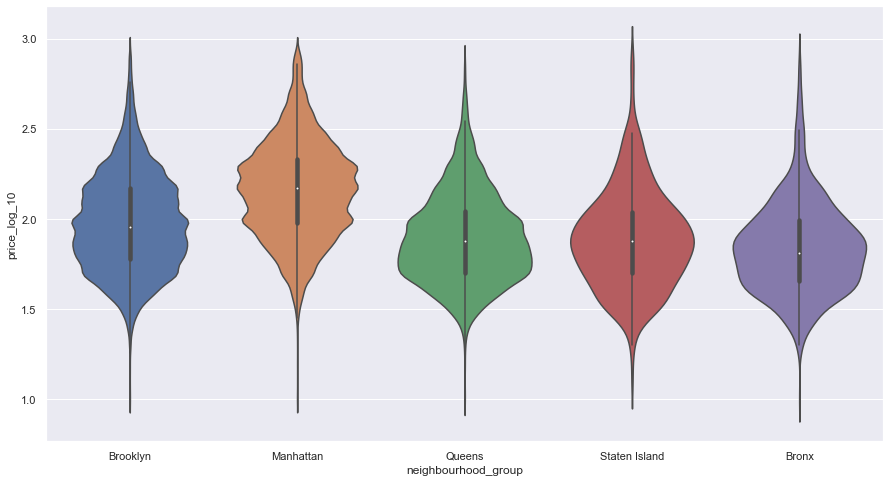

In [237]:
plt.figure(figsize=(15,8))
sns.violinplot("neighbourhood_group", "price_log_10", data=data1)

D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neighbourhood_group', ylabel='price_log_10'>

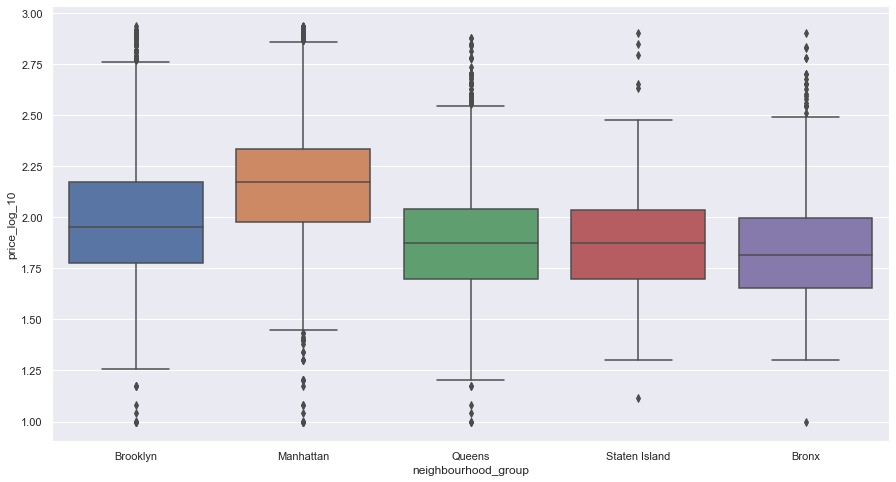

In [238]:
plt.figure(figsize=(15,8))
sns.boxplot("neighbourhood_group", "price_log_10", data=data1)

# Anova test

In [239]:
fstat, pval = stats.f_oneway(*[data1.price_log_10[data1.neighbourhood_group == s]
for s in data1.neighbourhood_group.unique()])
print("Oneway Anova log10(price) ~ neighbourhood_group F=%.2f, p-value=%E" % (fstat, pval))

Oneway Anova log10(price) ~ neighbourhood_group F=1926.63, p-value=0.000000E+00


In [240]:
data1[["neighbourhood_group",'price']].groupby("neighbourhood_group").describe()

price                                             \
                       count        mean         std   min   25%    50%   
neighbourhood_group                                                       
Bronx                 1088.0   84.521140   72.677670  10.0  45.0   65.0   
Brooklyn             20011.0  116.576783   88.430146  10.0  60.0   90.0   
Manhattan            21377.0  174.867942  121.627249  10.0  95.0  149.0   
Queens                5650.0   94.104779   69.190842  10.0  50.0   75.0   
Staten Island          370.0   96.148649   84.022175  13.0  50.0   75.0   

                                   
                       75%    max  
neighbourhood_group                
Bronx                 99.0  800.0  
Brooklyn             149.0  860.0  
Manhattan            215.0  860.0  
Queens               110.0  750.0  
Staten Island        109.0  800.0

# realation between room_type & price_log_10

D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='room_type', ylabel='price_log_10'>

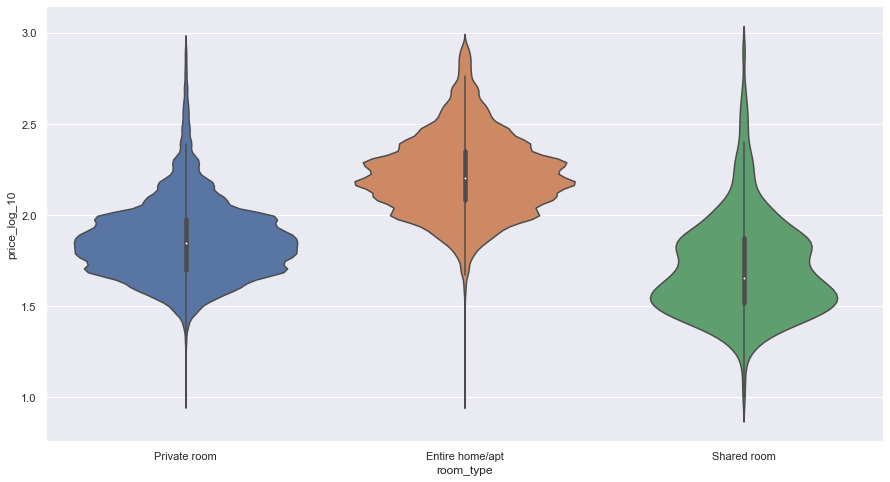

In [241]:
plt.figure(figsize=(15,8))
sns.violinplot("room_type", "price_log_10", data=data1)

D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='room_type', ylabel='price_log_10'>

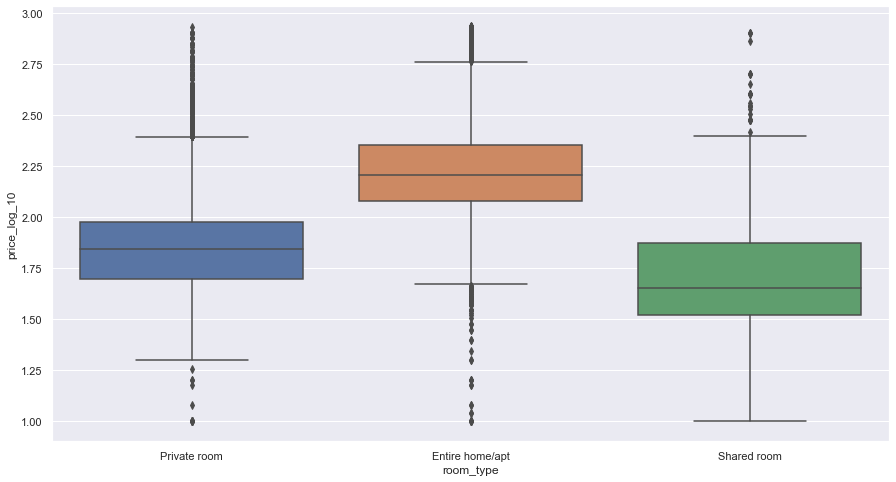

In [242]:
plt.figure(figsize=(15,8))
sns.boxplot("room_type", "price_log_10", data=data1)

In [243]:
fstat, pval = stats.f_oneway(*[data1.price_log_10[data1.room_type == s]
for s in data1.room_type.unique()])
print("Oneway Anova log10(price) ~ room_type F=%.2f, p-value=%E" % (fstat, pval))

Oneway Anova log10(price) ~ room_type F=17381.79, p-value=0.000000E+00


In [161]:
room = data1.groupby('room_type')['id'].agg(['count'])
room.head()

,count
room_type,
Entire home/apt,25100
Private room,22242
Shared room,1154


In [162]:
room.reset_index(level=0, inplace=True)
room.head()

,room_type,count
0,Entire home/apt,25100
1,Private room,22242
2,Shared room,1154


In [163]:
room = room[['room_type','count']]

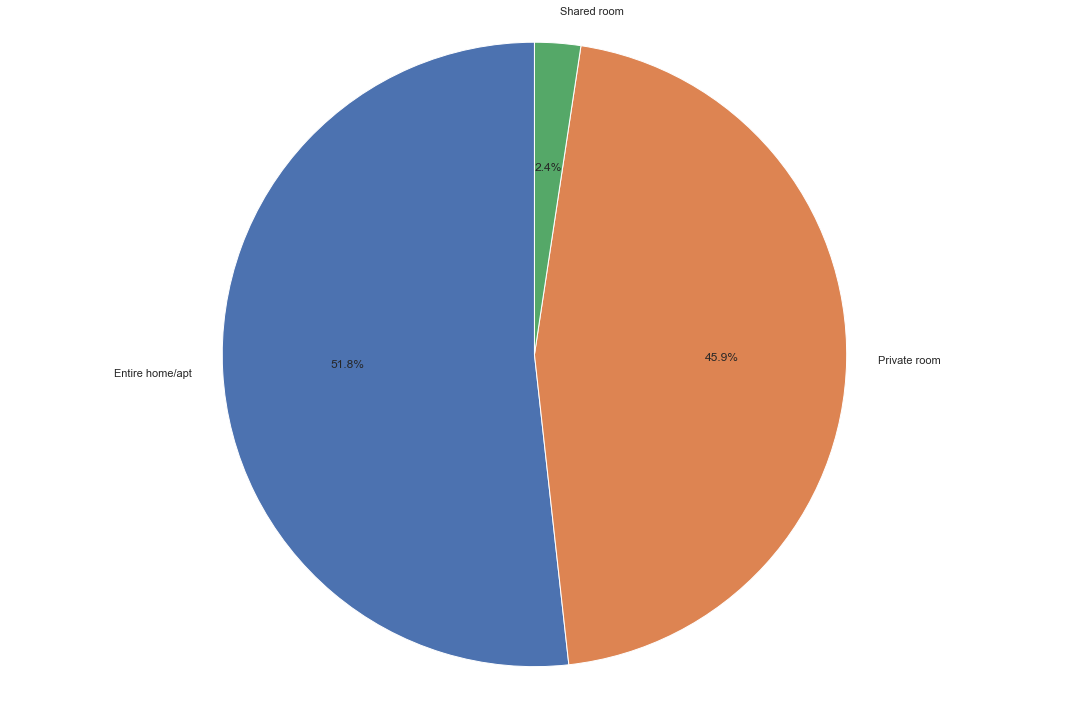

In [164]:
plt.pie(
    room['count'],
    labels=room['room_type'],
    shadow=False,
    startangle=90,
    autopct='%1.1f%%',
    )

plt.axis('equal')

plt.tight_layout()
plt.show()

In [191]:
temp = data1[data1['neighbourhood_group'] == 'Manhattan']
temp['room_type'].value_counts()

Entire home/apt    12965
Private room        7933
Shared room          479
Name: room_type, dtype: int64

<AxesSubplot:xlabel='room_type'>

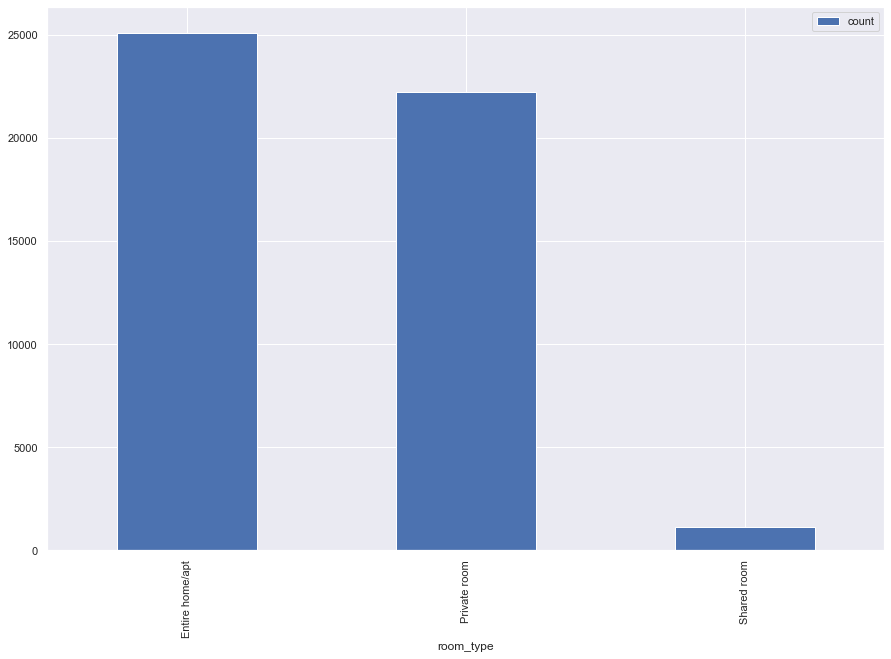

In [194]:
data1.groupby('room_type')['id'].agg(['count']).plot(kind="bar")

# Room type vs availability

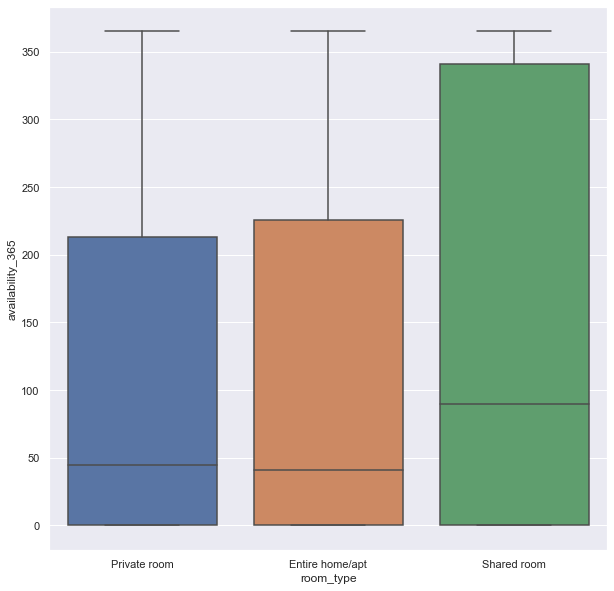

In [244]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=data1, x='room_type',y='availability_365')

# Neighbourhood vs availability

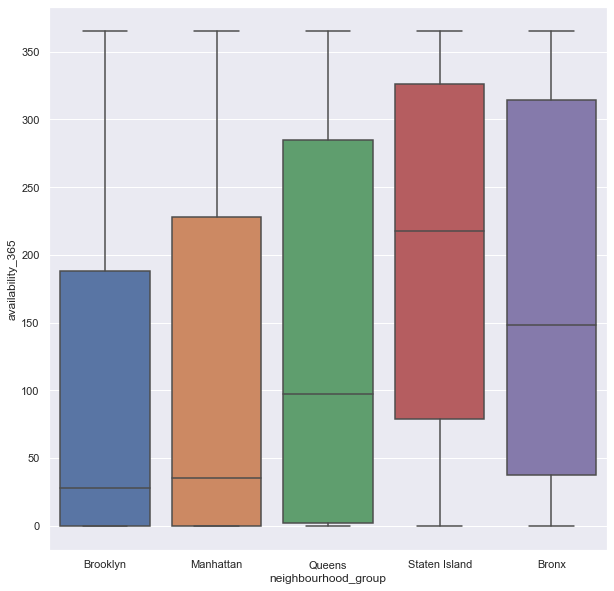

In [245]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=data1, x='neighbourhood_group',y='availability_365')

# Nights Booked

D:\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


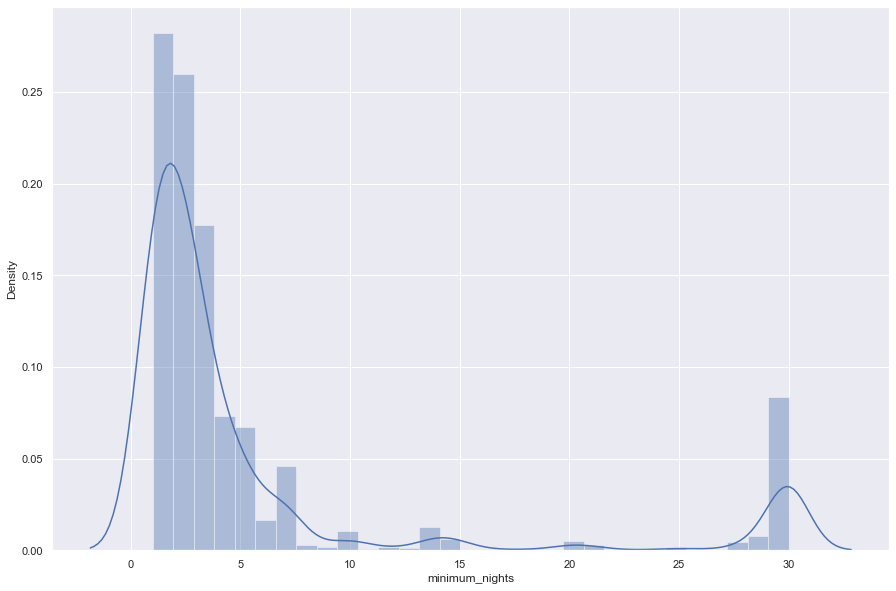

In [174]:
sns.distplot(df[(df['minimum_nights'] <= 30) & (df['minimum_nights'] > 0)]['minimum_nights'], bins=31)
plt.ioff()

# Correlation between different features

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'Unnamed: 16', 'Unnamed: 17'],
      dtype='object')

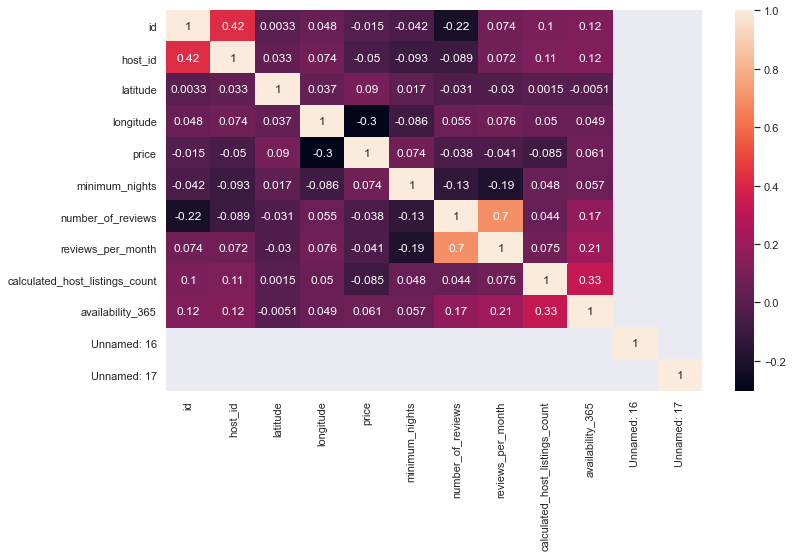

In [176]:
#Get correlation between different features
corr = data.corr(method='kendall')
plt.figure(figsize=(12,7))
sns.heatmap(corr, annot=True)
data.columns

In [178]:
data1.reviews_per_month.describe()

count    48496.000000
mean         1.095951
std          1.600386
min          0.000000
25%          0.040000
50%          0.380000
75%          1.600000
max         58.500000
Name: reviews_per_month, dtype: float64

In [115]:
temp = data1[data1['reviews_per_month']>0]
temp.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Unnamed: 16,Unnamed: 17,price_log_e,price_log_10,All_year_availability
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,9,10/19/2018,0.21,6,365,0.0,0.0,5.003946,2.173186,1
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,45,5/21/2019,0.38,2,355,0.0,0.0,5.416100,2.352183,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,...,270,7/5/2019,4.64,1,194,0.0,0.0,4.488636,1.949390,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,...,9,11/19/2018,0.10,1,0,0.0,0.0,4.382027,1.903090,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,...,74,6/22/2019,0.59,1,129,0.0,0.0,5.298317,2.301030,0


In [116]:


temp.describe()



,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Unnamed: 16,Unnamed: 17,price_log_e,price_log_10,All_year_availability
count,3.863700e+04,3.863700e+04,38637.000000,38637.000000,38637.000000,38637.000000,38637.000000,38637.000000,38637.000000,38637.000000,38637.0,38637.0,38637.000000,38637.000000,38637.000000
mean,1.809885e+07,6.423962e+07,40.728097,-73.951028,133.982737,5.847840,29.364392,1.375605,5.176411,114.355566,0.0,0.0,4.684235,2.034337,0.020990
std,1.069305e+07,7.588907e+07,0.055058,0.046730,101.159171,17.301728,48.271404,1.682290,26.362879,129.282480,0.0,0.0,0.638155,0.277147,0.143353
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.0,0.0,2.302585,1.000000,0.000000
25%,8.720923e+06,7.050126e+06,40.688600,-73.982370,68.000000,1.000000,3.000000,0.190000,1.000000,0.000000,0.0,0.0,4.219508,1.832509,0.000000
50%,1.887209e+07,2.837867e+07,40.721600,-73.954710,100.000000,2.000000,9.000000,0.720000,1.000000,54.000000,0.0,0.0,4.605170,2.000000,0.000000
75%,2.755942e+07,1.018839e+08,40.763000,-73.934930,169.000000,4.000000,33.000000,2.020000,2.000000,227.000000,0.0,0.0,5.129899,2.227887,0.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,860.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,0.0,0.0,6.756932,2.934498,1.000000


# realation between reviews_per_month & neighbourhood_group

D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neighbourhood_group', ylabel='reviews_per_month'>

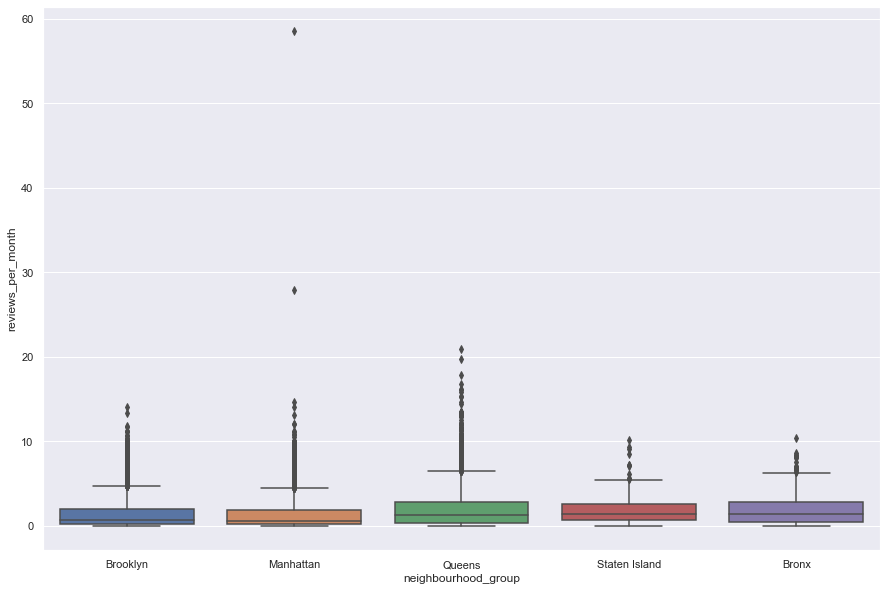

In [117]:
plt.figure(figsize=(15,10))
sns.boxplot("neighbourhood_group", "reviews_per_month", data=temp)

In [118]:


fstat, pval = stats.f_oneway(*[temp.reviews_per_month[temp.neighbourhood_group == s]
for s in temp.neighbourhood_group.unique()])
print("Oneway Anova reviews_per_month ~ neighbourhood_group F=%.2f, p-value=%E" % (fstat, pval))



Oneway Anova reviews_per_month ~ neighbourhood_group F=182.84, p-value=1.674033E-155


In [120]:
### Checking if there are duplicate host_ids and whats is the maximum number of listings per host_id
df2 = data1.groupby(["host_id"])
max(df2.size())

327

In [121]:
## Here we can see that 32K host_ids are unique appearing only once whereas some host_ids appear as much as 238 times
df2.size().value_counts().head()

1    32062
2     3310
3      945
4      357
5      167
dtype: int64

In [122]:
df2.size().value_counts().tail()

50    1
49    1
16    1
43    1
32    1
dtype: int64

In [123]:
### Finding the host_id with maximum listings
host_id_counts = data1["host_id"].value_counts()
max_host = host_id_counts.idxmax()
max_host

219517861

In [124]:
###We see that Sonder(NYC) has the max number of listings
data1[data1["host_id"]==219517861]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Unnamed: 16,Unnamed: 17,price_log_e,price_log_10,All_year_availability
38293,30181691,Sonder | 180 Water | Incredible 2BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,...,0,NotReviewed,0.00,327,309,0.0,0.0,5.710427,2.480007,0
38294,30181945,Sonder | 180 Water | Premier 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,...,1,5/29/2019,0.73,327,219,0.0,0.0,5.433722,2.359835,0
38588,30347708,Sonder | 180 Water | Charming 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,...,1,5/21/2019,0.60,327,159,0.0,0.0,5.446737,2.365488,0
39769,30937590,Sonder | The Nash | Artsy 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262,...,8,6/9/2019,1.86,327,91,0.0,0.0,5.568345,2.418301,0
39770,30937591,Sonder | The Nash | Lovely Studio + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255,...,14,6/10/2019,2.59,327,81,0.0,0.0,5.541264,2.406540,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47691,35871510,Sonder | 116 John | Vibrant Studio + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70818,-74.00631,Entire home/apt,135,...,0,NotReviewed,0.00,327,339,0.0,0.0,4.905275,2.130334,0
47692,35871511,Sonder | 116 John | Vibrant 1BR + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70691,-74.00682,Entire home/apt,165,...,0,NotReviewed,0.00,327,342,0.0,0.0,5.105945,2.217484,0
47693,35871515,Sonder | 116 John | Stunning 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70772,-74.00673,Entire home/apt,165,...,0,NotReviewed,0.00,327,347,0.0,0.0,5.105945,2.217484,0
47814,35936418,Sonder | 116 John | Polished Studio + Gym,219517861,Sonder (NYC),Manhattan,Financial District,40.70840,-74.00518,Entire home/apt,699,...,0,NotReviewed,0.00,327,327,0.0,0.0,6.549651,2.844477,0


In [125]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [126]:
len(df.neighbourhood.unique())

221

In [127]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [128]:
top_host=df.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [129]:
top_host_check=df.calculated_host_listings_count.max()
top_host_check

327

In [130]:
#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

In [131]:
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_host_df

,Host_ID,P_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96
5,16098958,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


[Text(0, 0, '7503643'),
 Text(1, 0, '12243051'),
 Text(2, 0, '16098958'),
 Text(3, 0, '22541573'),
 Text(4, 0, '30283594'),
 Text(5, 0, '61391963'),
 Text(6, 0, '107434423'),
 Text(7, 0, '137358866'),
 Text(8, 0, '200380610'),
 Text(9, 0, '219517861')]

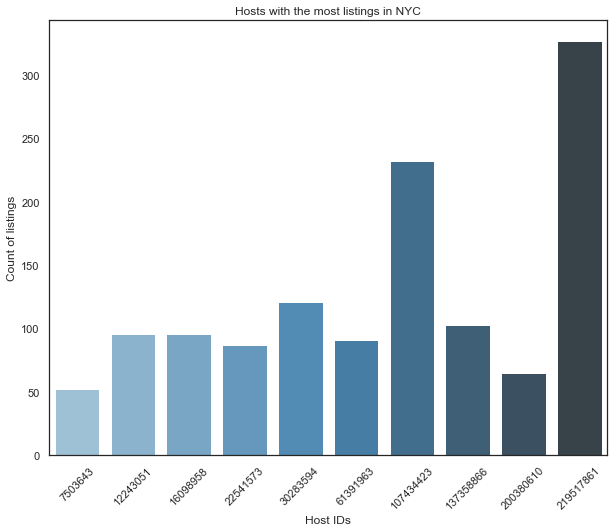

In [132]:
viz_1=sns.barplot(x="Host_ID", y="P_Count", data=top_host_df,
                 palette='Blues_d')
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

In [133]:
#let's find out more about our neiberhoods presented 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', and 'Bronx'

#Brooklyn
sub_1=df.loc[df['neighbourhood_group'] == 'Brooklyn']
price_sub1=sub_1[['price']]
#Manhattan
sub_2=df.loc[df['neighbourhood_group'] == 'Manhattan']
price_sub2=sub_2[['price']]
#Queens
sub_3=df.loc[df['neighbourhood_group'] == 'Queens']
price_sub3=sub_3[['price']]
#Staten Island
sub_4=df.loc[df['neighbourhood_group'] == 'Staten Island']
price_sub4=sub_4[['price']]
#Bronx
sub_5=df.loc[df['neighbourhood_group'] == 'Bronx']
price_sub5=sub_5[['price']]
#putting all the prices' dfs in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

In [134]:
#creating an empty list that we will append later with price distributions for each neighbourhood_group
p_l_b_n_2=[]
#creating list with known values in neighbourhood_group column
nei_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)
#changing names of the price column to the area name for easier reading of the table    
p_l_b_n_2[0].rename(columns={'price':nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price':nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price':nei_list[2]}, inplace=True)
p_l_b_n_2[3].rename(columns={'price':nei_list[3]}, inplace=True)
p_l_b_n_2[4].rename(columns={'price':nei_list[4]}, inplace=True)
#finilizing our dataframe for final view    
stat_df=p_l_b_n_2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.0,0.0,10.0,13.0,0.0
25%,60.0,95.0,50.0,50.0,45.0
50%,90.0,150.0,75.0,75.0,65.0
75%,150.0,220.0,110.0,110.0,99.0
max,10000.0,10000.0,10000.0,5000.0,2500.0


Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

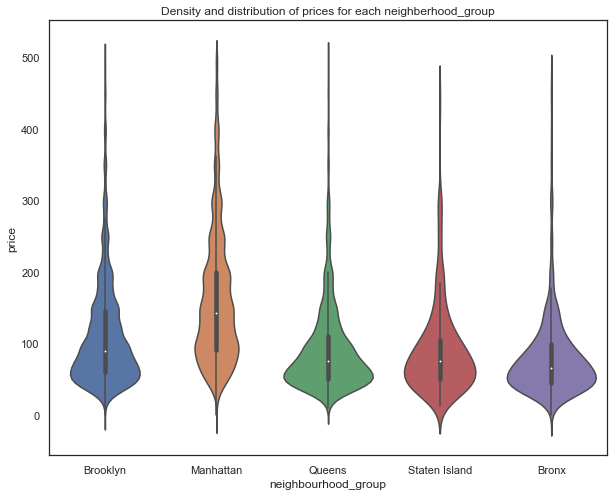

In [135]:
#we can see from our statistical table that we have some extreme values, therefore we need to remove them for the sake of a better visualization

#creating a sub-dataframe with no extreme values / less than 500
sub_6=df[df.price < 500]
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=sub_6, x='neighbourhood_group', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

In [136]:
#as we saw earlier from unique values for neighbourhood there are way too many to concentrate on;
#therefore, let's grab just top 10 neighbourhoods that have the most listings in them

#finding out top 10 neighbourhoods
df.neighbourhood.value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

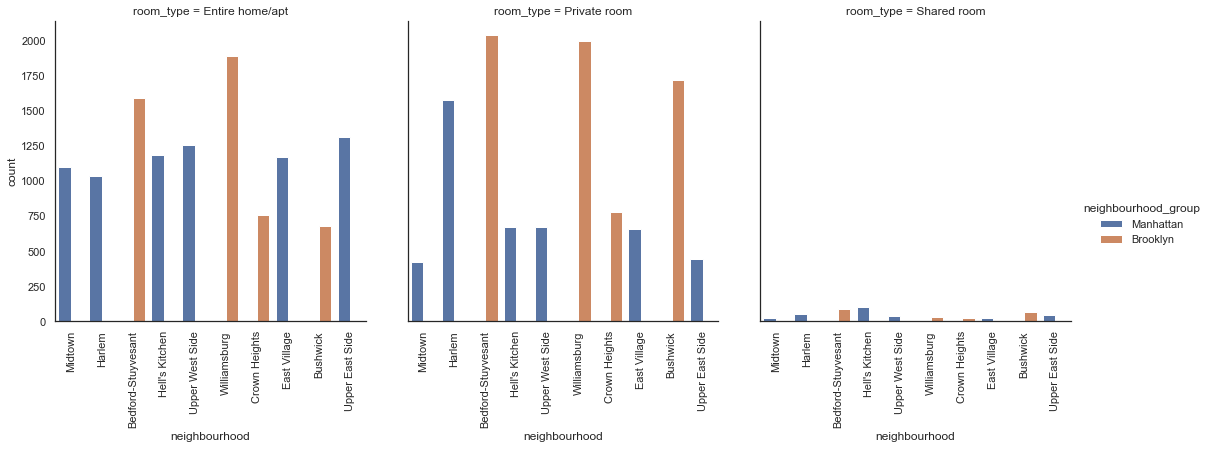

In [137]:
#let's now combine this with our boroughs and room type for a rich visualization we can make

#grabbing top 10 neighbourhoods for sub-dataframe
sub_7=df.loc[df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
#using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_7, kind='count')
viz_3.set_xticklabels(rotation=90)

In [146]:
df[['neighbourhood','neighbourhood_group','host_id']].sort_values('neighbourhood',ascending =False).head(10)

,neighbourhood,neighbourhood_group,host_id
37574,Woodside,Queens,192773562
33857,Woodside,Queens,19303369
44700,Woodside,Queens,259229690
44697,Woodside,Queens,259229690
35184,Woodside,Queens,137358866
44693,Woodside,Queens,259229690
40673,Woodside,Queens,137358866
1556,Woodside,Queens,3621183
35157,Woodside,Queens,210687004
24112,Woodside,Queens,136211138


D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neighbourhood_group', ylabel='host_id'>

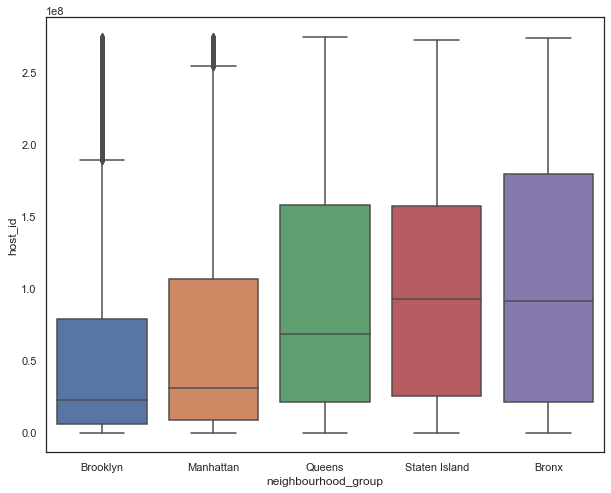

In [147]:
sns.boxplot("neighbourhood_group", "host_id", data=data1)